In [1]:
import numpy as np
import pandas as pd

from lets_plot import *


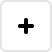
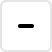
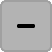
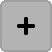
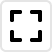
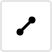
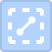
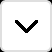
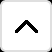
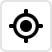
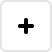
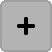
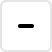
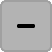
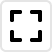
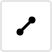
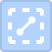
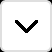
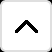
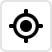

In [2]:
LetsPlot.setup_html()

In [3]:
def get_data(f, n=8, t=None):
    ts = np.linspace(0, n, n + 1) if t is None else t
    xs = [f(elem) for elem in ts]
    ys = [0.0] * len(xs)
    return pd.DataFrame(dict(x=xs, y=ys))

In [4]:
def get_plot(test_name, test_df, breaks=None, labels=None, trans='log10'):
    return ggplot(test_df, aes('x', 'y')) + \
        geom_point() + \
        scale_x_continuous(trans=trans, breaks=breaks, labels=labels) + \
        ggtitle(test_name)

In [5]:
get_plot("Cubes (default example)", get_data(lambda x: x**3))

In [6]:
get_plot("Only degrees of 10", get_data(lambda x: 10**x))

In [7]:
get_plot("Inside the [0, 1] segment", get_data(lambda x: 10**(-x)))

In [8]:
get_plot("Range is too short to use only degrees of 10", get_data(lambda x: 2**x, t=range(1, 6)))

In [9]:
gggrid([
    get_plot("Formulas of the form c*10^d", get_data(lambda x: (x + 1) * 10**(-2))),
    get_plot("Formulas of the form c*10^d\nWith formatting of the x-axis", get_data(lambda x: (x + 1) * 10**(-2))) + scale_x_continuous(format='.4f'),
    get_plot("Formulas of the form c*10^d\nWith negative coefficients", get_data(lambda x: -(x + 1) * 10**(-2)), trans='symlog'),
], ncol=1)

In [10]:
get_plot("Without transformation", get_data(lambda x: 10**(-x)), trans=None) + xlim(0, 10**(-5))